In [1]:

import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [47]:
# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images, labels, and masks
images = []
labels = []
masks = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize a mask for the original-sized image
        original_image = cv2.imread(image_path)
        original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text
                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Create a binary mask using the bounding box coordinates
                object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
                object_mask[ymin:ymax, xmin:xmax] = 1

                # Add the object mask to the composite mask
                original_mask = np.maximum(original_mask, object_mask)

        # Resize the original-sized image and mask to the common size
        image = cv2.resize(original_image, common_image_size)
        mask = cv2.resize(original_mask, common_image_size)

        # Append the resized image and label to the lists
        images.append(image)
        labels.append(label)

        # Append the resized mask to the masks list
        masks.append(mask)

# Convert the lists to NumPy arrays
images = np.array(images)
masks = np.array(masks)
labels = np.array(labels)

# Now, you have NumPy arrays for the resized images, masks, and labels
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Labels shape: {labels.shape}")
# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (899, 224, 224, 3)
Masks shape: (899, 224, 224)
Labels shape: (899,)
Class: APAL, Count: 113
Class: Pseudodiploria, Count: 786


In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Your data shapes
# Images shape: (899, 224, 224, 3)
# Masks shape: (899, 224, 224)
# Labels shape: (899,)

# Number of image-mask pairs to display
num_pairs_to display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    mask = masks[i]
    label = labels[i]

    # Create a new image with back part as blue and white part as red
    back_mask = np.zeros_like(mask)
    back_mask[mask == 0] = 1  # Set the back part of the mask to 1 (white)
    red_mask = np.zeros_like(mask)
    red_mask[mask != 0] = 1  # Set the white part of the mask to 1 (red)
    blue_mask = np.zeros_like(mask)
    blue_mask[mask == 0] = 1  # Set the back part of the mask to 1 (blue)

    # Create a new mask with blue and red parts
    combined_mask = np.stack([blue_mask, np.zeros_like(mask), red_mask], axis=-1)

    # Convert the combined mask to a uint8 image (0 or 255 values)
    combined_mask = combined_mask * 255

    # Overlay the combined mask on top of the original image
    overlay_image = cv2.addWeighted(image, 1, combined_mask, 0.7, 0)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the modified mask with blue and red parts
    axes[i, 1].imshow(combined_mask)
    axes[i, 1].axis('off')

    # Plot the overlay image
    axes[i, 2].imshow(overlay_image)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


SyntaxError: invalid syntax (4263534197.py, line 11)

In [34]:
# Filter images and labels for the "apal" class
apal_images = images[labels == "APAL"]
apal_labels = labels[labels == "APAL"]
apal_masks = masks[labels == "APAL"]
# Check the shape of the filtered data
print(f"Filtered APAL Images shape: {apal_images.shape}")
print(f"Filtered APAL Labels shape: {apal_labels.shape}")
print(f"Filtered APAL Labels shape: {apal_masks.shape}")

Filtered APAL Images shape: (113, 224, 224, 3)
Filtered APAL Labels shape: (113,)
Filtered APAL Labels shape: (113, 224, 224)


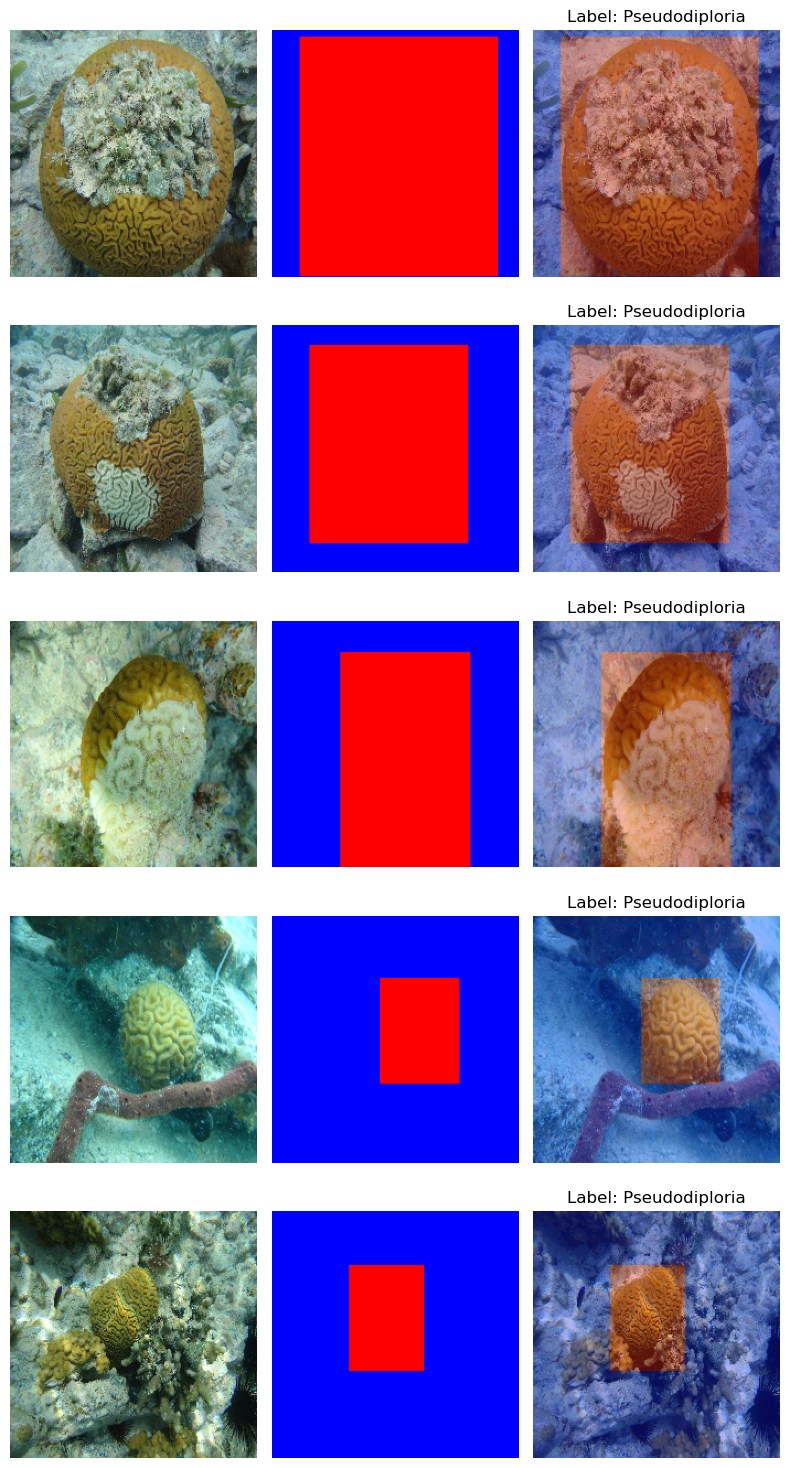

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Your data shapes
# Images shape: (899, 224, 224, 3)
# Masks shape: (899, 224, 224)
# Labels shape: (899,)

# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    mask = masks[i]
    label = labels[i]

    # Create a blue mask for the back part
    blue_mask = (mask == 0).astype(np.uint8) * 255

    # Create a red mask for the white part
    red_mask = (mask != 0).astype(np.uint8) * 255

    # Create a new image with blue and red regions based on the masks
    combined_mask = np.zeros_like(image)
    combined_mask[:, :, 0] = red_mask  # Set the red channel to red_mask
    combined_mask[:, :, 2] = blue_mask  # Set the blue channel to blue_mask

    # Overlay the combined mask on top of the original image
    overlay_image = cv2.addWeighted(image, 0.7, combined_mask, 0.3, 0)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the modified mask with blue and red parts
    axes[i, 1].imshow(combined_mask)
    axes[i, 1].axis('off')

    # Plot the overlay image
    axes[i, 2].imshow(overlay_image)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [30]:
# # Define the paths to your image and annotation folders
# path_image = "../data/external/Coral_images/image02"
# path_annotations = "/Users/sumaiyauddin/Documents/Semester03/Coral_images/APAL"

# # Initialize lists to store images, labels, and masks
# images = []
# labels = []
# masks = []

# # Common image size (e.g., 224x224)
# common_image_size = (224, 224)

# # Iterate through each XML file in the annotation folder
# for xml_filename in os.listdir(path_annotations):
#     if xml_filename.lower().endswith(".xml"):
#         xml_path = os.path.join(path_annotations, xml_filename)

#         # Extract the corresponding image filename
#         image_filename = xml_filename.replace(".xml", ".jpg")
#         image_path = os.path.join(path_image, image_filename)

#         # Check if the image file exists
#         if not os.path.exists(image_path):
#             print(f"Image not found for XML: {xml_filename}")
#             continue

#         # Parse the XML file to extract the label and bounding box coordinates
#         tree = ET.parse(xml_path)
#         root = tree.getroot()

#         # Initialize a mask for the original-sized image
#         original_image = cv2.imread(image_path)
#         original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

#         for object_elem in root.findall("object"):
#             name_elem = object_elem.find("name")
#             bndbox_elem = object_elem.find("bndbox")

#             if name_elem is not None and bndbox_elem is not None:
#                 label = name_elem.text
#                 xmin = int(bndbox_elem.find("xmin").text)
#                 ymin = int(bndbox_elem.find("ymin").text)
#                 xmax = int(bndbox_elem.find("xmax").text)
#                 ymax = int(bndbox_elem.find("ymax").text)

#                 # Create a binary mask using the bounding box coordinates
#                 object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
#                 object_mask[ymin:ymax, xmin:xmax] = 1

#                 # Add the object mask to the composite mask
#                 original_mask = np.maximum(original_mask, object_mask)

#         # Resize the original-sized image and mask to the common size
#         image = cv2.resize(original_image, common_image_size)
#         mask = cv2.resize(original_mask, common_image_size)

#         # Append the resized image and label to the lists
#         images.append(image)
#         labels.append(label)

#         # Append the resized mask to the masks list
#         masks.append(mask)

# # Convert the lists to NumPy arrays
# images2 = np.array(images)
# masks2 = np.array(masks)
# labels2 = np.array(labels)

# # Now, you have NumPy arrays for the resized images, masks, and labels
# print(f"Images shape: {images2.shape}")
# print(f"Masks shape: {masks2.shape}")
# print(f"Labels shape: {labels2.shape}")


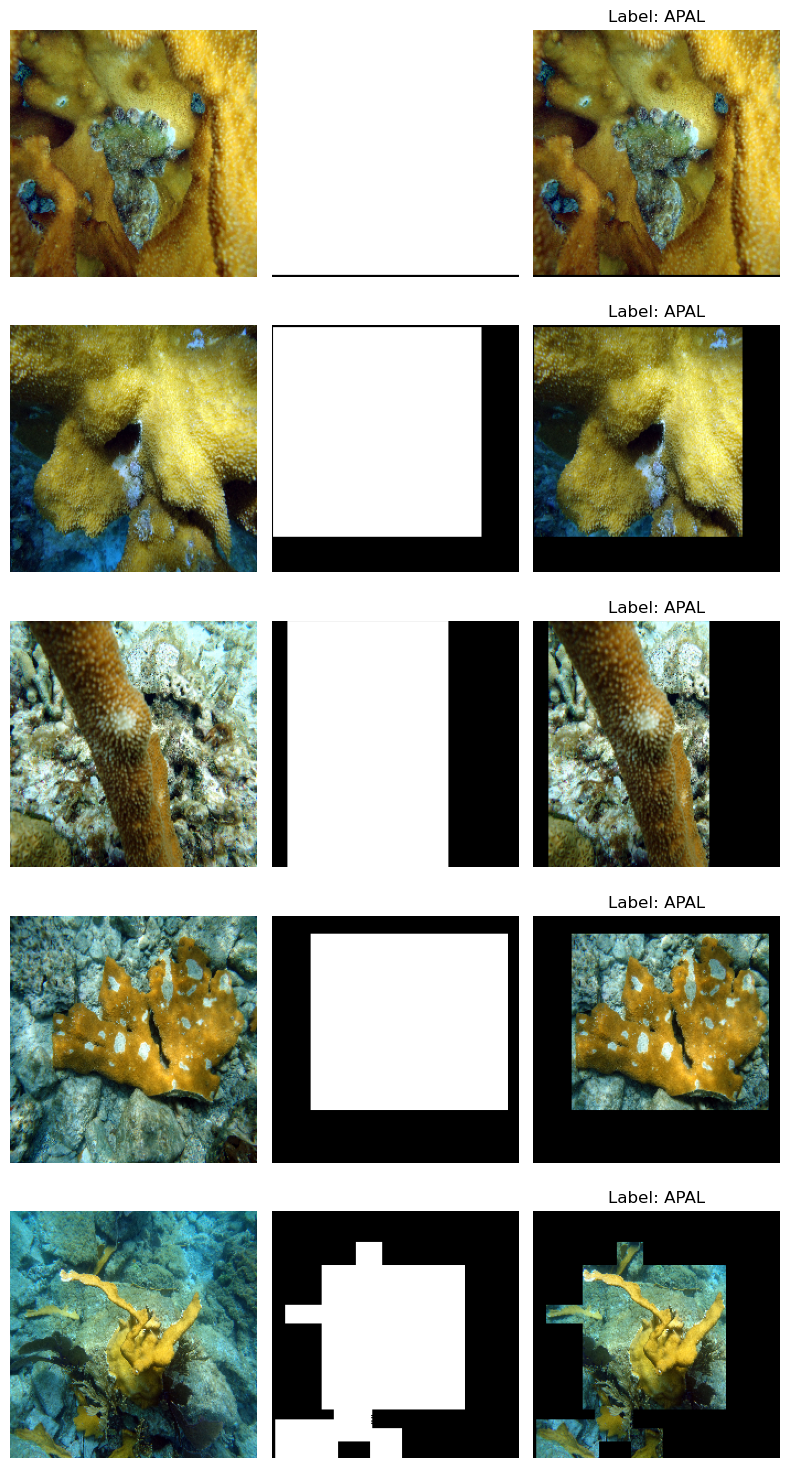

In [21]:
# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)
    mask = masks2[i]
    label = labels2[i]

    # Create a new image with only the masked region
    masked_region = cv2.bitwise_and(image, image, mask=mask)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].axis('off')

    # Plot the masked region
    axes[i, 2].imshow(masked_region)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
# Save the apal images to a pickle file
with open('images.pkl', 'wb') as file:
    pickle.dump(apal_images, file)

# Save the apal masks to a pickle file
with open('masks.pkl', 'wb') as file:
    pickle.dump(apal_masks, file)
    
# Save the apal labels to a pickle file
with open('labels.pkl', 'wb') as file:
    pickle.dump(apal_labels, file)


In [37]:


# Define the filenames for the pickle files
images2 = 'augmented_apal_images.pickle'
labels2 = 'augmented_apal_labels.pickle'
masks2 = 'augmented_apal_masks.pickle'

# Load the augmented images from the pickle file
with open(images2, 'rb') as file:
    images2 = pickle.load(file)

# Load the augmented labels from the pickle file
with open(labels2, 'rb') as file:
    labels2 = pickle.load(file)

# Load the augmented masks from the pickle file
with open(masks2, 'rb') as file:
    masks2 = pickle.load(file)
    
print("Loaded Images Shape:", images2.shape)
print("Loaded Labels Shape:", labels2.shape)
print("Loaded Masks Shape:", masks2.shape)




Loaded Images Shape: (565, 224, 224, 3)
Loaded Labels Shape: (565,)
Loaded Masks Shape: (565, 224, 224)


In [38]:
# Concatenate the loaded data
images = np.concatenate((images, images2), axis=0)
labels = np.concatenate((labels, labels2), axis=0)
masks = np.concatenate((masks, masks2), axis=0)

# Print the shape of the concatenated arrays
print("Concatenated Images Shape:", images.shape)
print("Concatenated Labels Shape:", labels.shape)
print("Concatenated Masks Shape:", masks.shape)


# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Concatenated Images Shape: (1464, 224, 224, 3)
Concatenated Labels Shape: (1464,)
Concatenated Masks Shape: (1464, 224, 224)
Class: APAL, Count: 678
Class: Pseudodiploria, Count: 786


## Splitting for classification

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936,)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235,)
X_test shape: (293, 224, 224, 3)
y_test shape: (293,)


In [42]:
# Save your data to a pickle file
with open('../data/external/data_vgg16.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

## Splitting for segmentation

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936, 224, 224)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235, 224, 224)
X_test shape: (293, 224, 224, 3)
y_test shape: (293, 224, 224)


In [45]:
# Save your data to a pickle file
with open('../data/external/data_mask.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

### YOLO loading

In [2]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET

# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images and YOLO labels
images = []
yolo_labels = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize YOLO label string for the current image
        yolo_label = ""

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text
                # Add a check to process only objects with the correct label
                if label != "APAL":
                    continue

                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Convert bounding box coordinates to YOLO format
                x_center = (xmin + xmax) / 2.0
                y_center = (ymin + ymax) / 2.0
                width = xmax - xmin
                height = ymax - ymin

                # Normalize coordinates and append to the YOLO label string
                yolo_label += f"{label} {x_center / common_image_size[0]} {y_center / common_image_size[1]} {width / common_image_size[0]} {height / common_image_size[1]}\n"

        # Read and resize the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, common_image_size)

        # Append the resized image and YOLO label to the lists
        images.append(image)
        yolo_labels.append(yolo_label)



In [3]:
# Convert the lists to NumPy arrays
images = np.array(images)
yolo_labels = np.array(yolo_labels)

# Now, you have NumPy arrays for the resized images and YOLO labels
print(f"Images shape: {images.shape}")
print(f"YOLO Labels shape: {yolo_labels.shape}")

Images shape: (899, 224, 224, 3)
YOLO Labels shape: (899,)


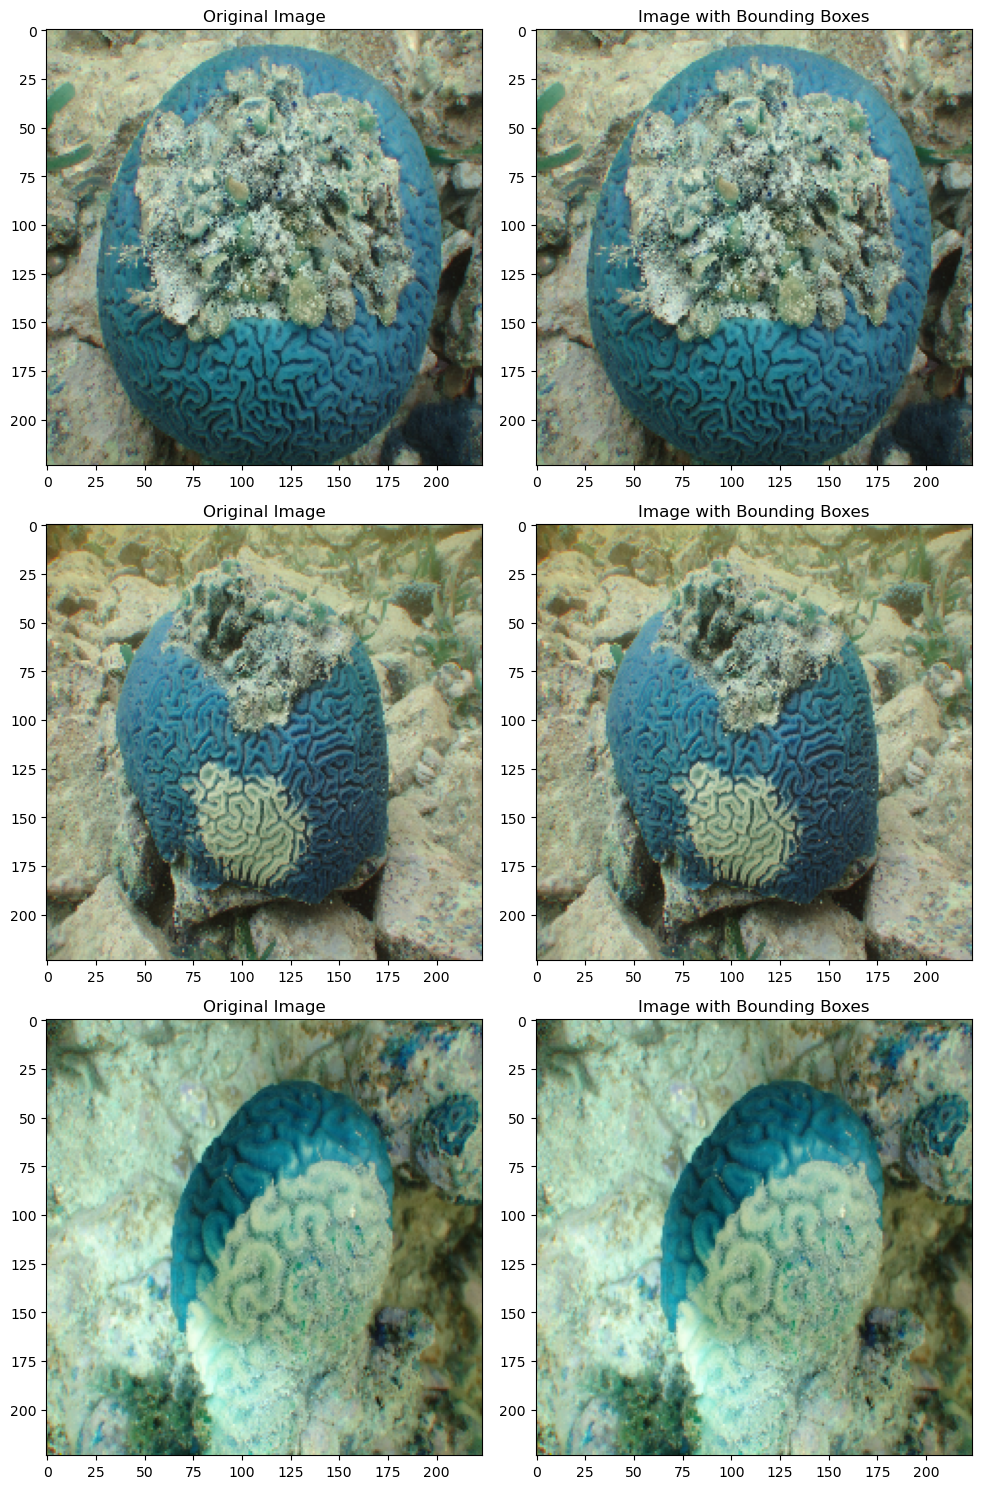

In [5]:
import matplotlib.pyplot as plt

# Function to draw bounding boxes on images
def draw_boxes(image, yolo_label):
    lines = yolo_label.split('\n')[:-1]  # Split lines and remove the empty last line
    for line in lines:
        values = list(map(float, line.split()[1:]))  # Skip the class index (label)

        # Check if there are enough values (at least 4)
        if len(values) >= 4:
            label, x_center, y_center, width, height = values[:5]  # Take the first 5 values

            # Convert YOLO coordinates back to original image coordinates
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            # Draw bounding box on the image
            color = (0, 255, 0)  # Green color
            thickness = 2
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
        else:
            print(f"Invalid YOLO label: {line}")

    return image

# Number of images to display
num_images_to_display = 3

# Create subplots
fig, axes = plt.subplots(num_images_to_display, 2, figsize=(10, 5 * num_images_to_display))

for i in range(num_images_to_display):
    # Display original image
    axes[i, 0].imshow(images[i])
    axes[i, 0].set_title('Original Image')

    # Display image with bounding boxes
    image_with_boxes = draw_boxes(images[i].copy(), yolo_labels[i])
    axes[i, 1].imshow(image_with_boxes)
    axes[i, 1].set_title('Image with Bounding Boxes')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [14]:
import os
import cv2
import numpy as np

def load_and_resize_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    return img

def load_yolo_labels(yolo_file_path):
    with open(yolo_file_path, 'r') as f:
        lines = f.readlines()
    labels = [list(map(float, line.strip().split())) for line in lines]
    return np.array(labels)

image_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image02"
yolo_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo"

target_size = (224, 224)

images = []
labels = []

for image_file in os.listdir(image_folder):
    if image_file.endswith((".jpg", ".JPG")):
        image_path = os.path.join(image_folder, image_file)
        yolo_file = os.path.join(yolo_folder, os.path.splitext(image_file)[0] + ".txt")

        if os.path.exists(yolo_file):
            image = load_and_resize_image(image_path, target_size)
            yolo_labels = load_yolo_labels(yolo_file)

            images.append(image)
            labels.append(yolo_labels)

# Filter out images without labels
non_empty_indices = [i for i, label in enumerate(labels) if label.shape[0] > 0]
images = np.array(images)[non_empty_indices]
labels = np.array(labels)[non_empty_indices]

# Check the shapes and print if necessary
print(f"Images shape: {images.shape}, YOLO Labels shape: {labels.shape}")


Images shape: (899, 224, 224, 3), YOLO Labels shape: (899,)


/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_39941/2179807611.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels)[non_empty_indices]


In [35]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET

# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images and YOLO labels
images = []
yolo_labels = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Define the classes you want to include
target_classes = ["APAL", "Pseudodiploria"]
# Define the classes and their corresponding numeric labels
class_mapping = {"APAL": 0, "Pseudodiploria": 1}

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize YOLO label string for the current image
        yolo_label = ""

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text

                # Add a check to process only objects with the correct label
                if label not in target_classes:
                    continue

                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Convert bounding box coordinates to YOLO format
                x_center = (xmin + xmax) / 2.0
                y_center = (ymin + ymax) / 2.0
                width = xmax - xmin
                height = ymax - ymin

                # Normalize coordinates and append to the YOLO label string
                yolo_label += f"{label} {x_center / common_image_size[0]} {y_center / common_image_size[1]} {width / common_image_size[0]} {height / common_image_size[1]}\n"

        # Read and resize the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, common_image_size)

        # Append the resized image and YOLO label to the lists
        images.append(image)
        yolo_labels.append(yolo_label)

# Convert the lists to numpy arrays
images = np.array(images)
yolo_labels = np.array(yolo_labels)

# Map class names to numeric labels
numeric_labels = []
for label in yolo_labels:
    parts = label.split()
    class_name = parts[0]  # Assuming the class name is the first part of the YOLO label
    numeric_label = class_mapping.get(class_name, -1)  # Use -1 for unknown classes
    numeric_labels.append(numeric_label)

labels = np.array(numeric_labels)

# Check the shapes
print(f"Images shape: {images.shape}, Numeric Labels shape: {labels.shape}")



Images shape: (899, 224, 224, 3), Numeric Labels shape: (899,)


In [36]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Print unique YOLO labels along with their counts
print("Unique YOLO Labels and Counts:")
for label, count in zip(unique_labels, label_counts):
    print(f"Label:\n{label}\nCount: {count}\n")


Unique YOLO Labels and Counts:
Label:
0
Count: 116

Label:
1
Count: 783



In [34]:
# Initialize count for images in APAL class
apal_image_count = 0

# Iterate through each YOLO label
for label in yolo_labels:
    # Split the label string into parts
    parts = label.split()

    # Check if the label is for the "APAL" class
    if len(parts) > 0 and parts[0] == "APAL":
        apal_image_count += 1

# Print the count
print(f"Number of images in 'APAL' class: {apal_image_count}")


Number of images in 'APAL' class: 116


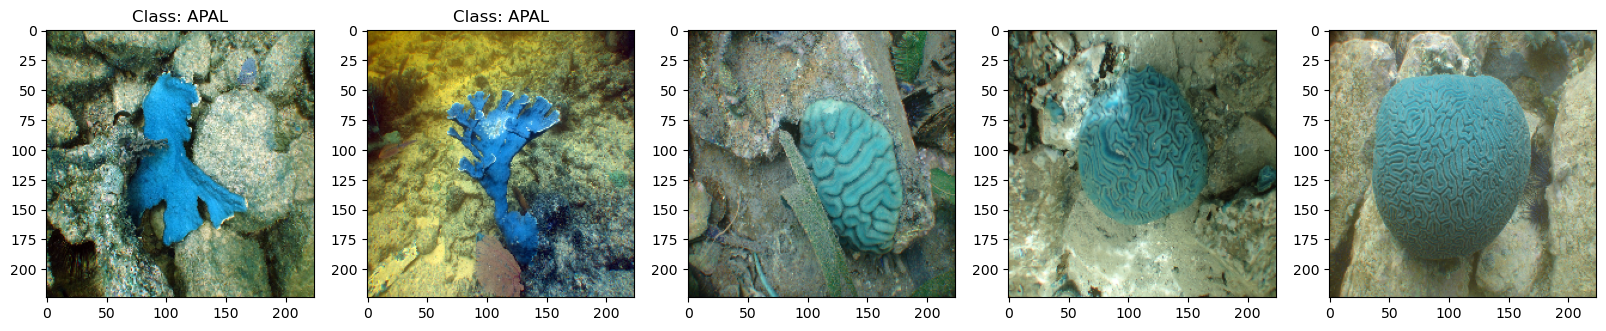

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose five random indices for images to plot
indices_to_plot = np.random.choice(len(images), 5, replace=False)

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, idx in enumerate(indices_to_plot):
    # Plot the image
    axes[i].imshow(images[idx])

    # Parse YOLO label for bounding box information
    label_info = yolo_labels[idx].split()
    
    # Skip if the label is empty
    if len(label_info) == 0:
        continue

    class_name = label_info[0]

    # Skip if the class name is not 'APAL'
    if class_name != 'APAL':
        continue

    x_center, y_center, width, height = map(float, label_info[1:])

    # Convert YOLO coordinates to image coordinates
    x_min = int((x_center - width / 2) * common_image_size[0])
    y_min = int((y_center - height / 2) * common_image_size[1])
    bbox_width = int(width * common_image_size[0])
    bbox_height = int(height * common_image_size[1])

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    axes[i].add_patch(rect)

    # Set plot title with class name
    axes[i].set_title(f"Class: {class_name}")

plt.show()


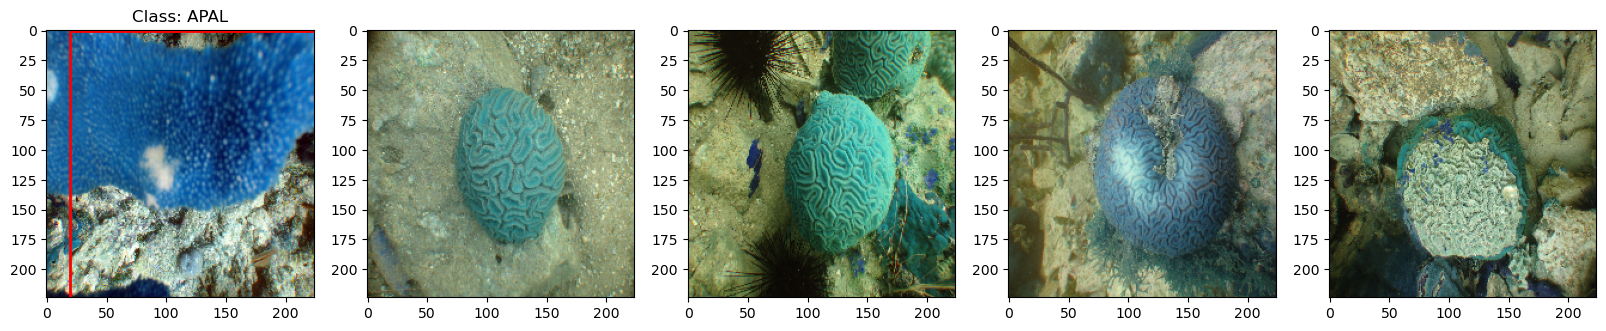

In [41]:
# Choose five random indices for images to plot
indices_to_plot = np.random.choice(len(images), 5, replace=False)

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, idx in enumerate(indices_to_plot):
    # Plot the image
    axes[i].imshow(images[idx])

    # Parse YOLO label for bounding box information
    label_info = yolo_labels[idx].split()

    # Skip if the label is empty or does not contain valid float values
    if len(label_info) < 5:
        continue

    class_name = label_info[0]

    # Skip if the class name is not 'APAL'
    if class_name != 'APAL':
        continue

    try:
        x_center, y_center, width, height = map(float, label_info[1:])
    except ValueError:
        continue

    # Convert YOLO coordinates to image coordinates
    x_min = int((x_center - width / 2) * common_image_size[0])
    y_min = int((y_center - height / 2) * common_image_size[1])
    bbox_width = int(width * common_image_size[0])
    bbox_height = int(height * common_image_size[1])

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    axes[i].add_patch(rect)

    # Set plot title with class name
    axes[i].set_title(f"Class: {class_name}")

plt.show()
